# UN Data Exploration

### Cavin Jacobson

1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = (
    pd.read_csv("../data/gdp_per_capita.csv")
    .rename(columns={"Country or Area" : "Country", "Value" : "GDP_Per_Capita"})
    .drop('Value Footnotes', axis=1)
)

In [6]:
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format = '%Y', errors='coerce').dt.to_period('Y')

How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

There are 7,662 rows, and 3 columns (once value footnotes is removed). Country is nominal categoric and is classified as an objectal, Year is ordinal categoric and has been converted to date timeal, and value is continuous numeric and is a float.l.

In [8]:
gdp_df.info()
gdp_df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   Country         7662 non-null   object       
 1   Year            7662 non-null   period[Y-DEC]
 2   GDP_Per_Capita  7662 non-null   float64      
dtypes: float64(1), object(1), period[Y-DEC](1)
memory usage: 179.7+ KB


,Country,Year,GDP_Per_Capita
7059,Tonga,1992,3847.025911


Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice? 

The years are 1990 to 2022. The number of observations is the lowest in 1990 and goes up into the 2000s and 2010s capping at 2013 before going back down a little in 2021.

In [10]:
gdp_df["Year"].min(),
gdp_df["Year"].max(),
gdp_df["Year"].value_counts().sort_index()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Freq: Y-DEC, Name: count, dtype: int64

In [11]:
gdp_df['Country'].nunique()
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations? 

There are 242 countries. The least represented are the Middle Eastern and African countries. I think this would be due to these countries being less developed, nd thus having less data collection organizations.

Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [14]:
gdp_2021 = gdp_df.loc[gdp_df["Year"] == '2021']

In [15]:
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution? It is unimodal with a heavy right skew. 

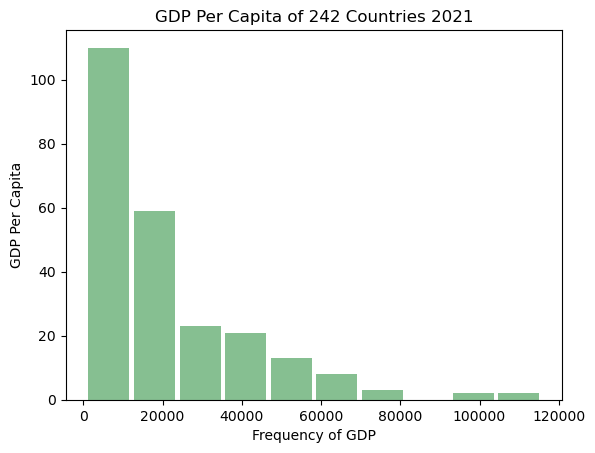

In [165]:
gdp_2021['GDP_Per_Capita'].hist(grid=False, color='#86bf91', zorder=2, rwidth=0.9);
plt.xlabel('Frequency of GDP')                            
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita of 242 Countries 2021');

Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [155]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False).head(5)

,Country,Year,GDP_Per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [161]:
gdp_2021.sort_values('GDP_Per_Capita', ascending = False).tail(5)

,Country,Year,GDP_Per_Capita
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686
972,Burundi,2021,714.066712


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted

In [21]:
gdp_pivoted = (
    gdp_df
    .pivot_table('GDP_Per_Capita', index = 'Country', columns = 'Year')
    .dropna(axis='rows', subset=['1990', '2021'])
    .loc[:, ['1990', '2021']]
)

Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [23]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted['2021'] - gdp_pivoted['1990']) / gdp_pivoted['1990']

In [131]:
gdp_pivoted['Percent_Change'].nsmallest(20)

Country
Burundi                                    -39.236385
Dem. Rep. Congo                            -38.654906
Congo                                      -35.406695
United Arab Emirates                       -34.147317
Central African Republic                   -30.243599
Zimbabwe                                   -21.799100
Gabon                                      -21.325301
Ukraine                                    -21.177578
Haiti                                      -20.251203
Madagascar                                 -18.043873
The Bahamas                                -15.757559
Brunei                                     -14.542192
Fragile and conflict affected situations   -10.913738
Guinea-Bissau                               -8.347123
Kyrgyz Republic                             -4.352813
Barbados                                    -2.430187
Tajikistan                                  -2.014757
Kiribati                                    -1.822996
The Gambia          

How many countries experienced a negative percent change in GDP per capita from 1990 to 2021? 19 Countries experienced a negative percent change.

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

Guinea had the highest change in fluctuation, peaking at 2008 and then crashing. China, the second, is steadily on the rise and has recently passed Guinea (2020).

In [129]:
gdp_pivoted['Percent_Change'].nlargest()

Country
Equatorial Guinea                              1463.081870
China                                          1140.082904
East Asia & Pacific (excluding high income)     603.268440
East Asia & Pacific (IDA & IBRD)                602.726652
Myanmar                                         593.351678
Name: Percent_Change, dtype: float64

In [227]:
gdp_percent_change_table = (
    gdp_df
    .pivot_table(
        'GDP_Per_Capita', 
        index = 'Country', 
        columns = 'Year'
    )
    .dropna(
        axis='rows', 
        subset=['1990', '2021']
    )
)

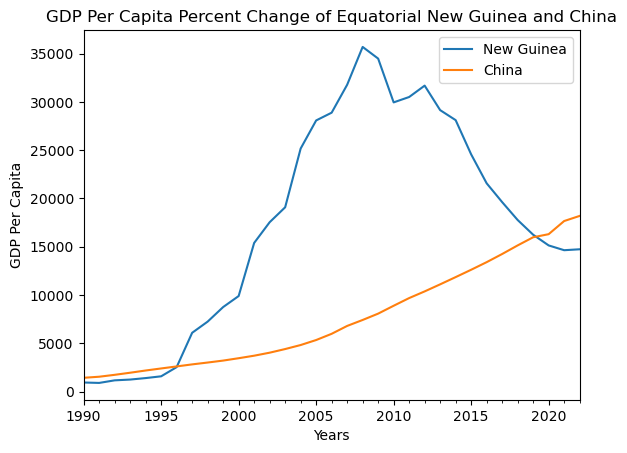

In [29]:
gdp_percent_change_table.loc['Equatorial Guinea'].plot.line(label='New Guinea'), 
gdp_percent_change_table.loc['China'].plot.line(label='China').legend()
plt.xlabel('Years')                            
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Percent Change of Equatorial New Guinea and China');

In [30]:
continents = pd.read_csv("../data/continents.csv")

Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [32]:
gdp_df = pd.merge(gdp_df, continents, on = 'Country')

Determine the number of countries per continent. Create a bar chart showing this.

In [34]:
gdp_df.Continent.value_counts().unique()

array([1585, 1372, 1297,  840,  436,  363], dtype=int64)

In [35]:
gdp_df_clean = gdp_df.drop_duplicates(subset='Country')
gdp_df_counts= gdp_df_clean['Continent'].value_counts()

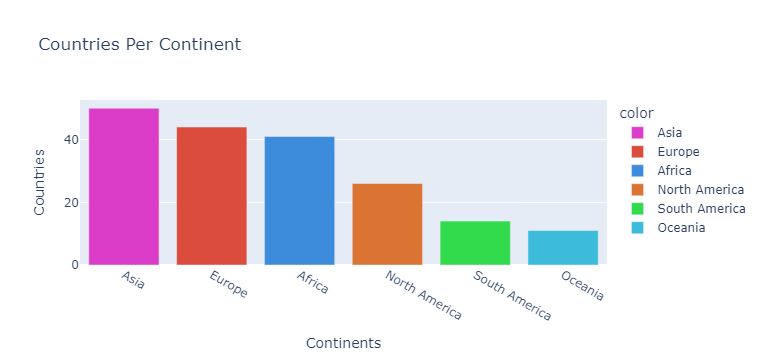

In [275]:
px.bar(
    x=gdp_df_clean['Continent'].unique(),
    y=gdp_df_counts,
    color=['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'],
    color_discrete_sequence=['#DB3DC9', '#DB4C3D', '#3D8CDB','#DB7332','#32DB4C','#3DBBDB'],
    title='Countries Per Continent',
    labels={'x':'Continents', 'y':'Countries'}
)

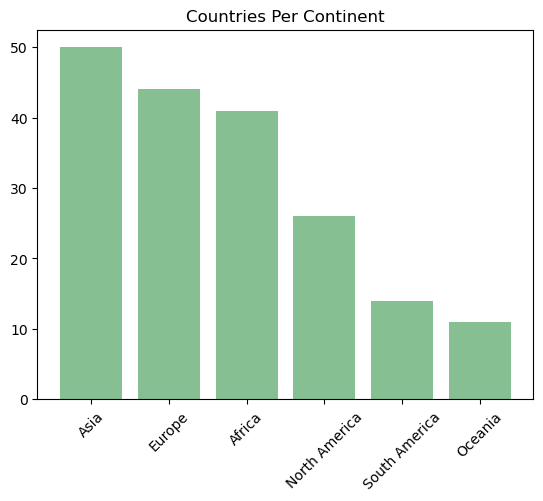

In [235]:
plt.bar(gdp_df_clean['Continent'].unique(), gdp_df_counts, color='#86bf91')
plt.title('Countries Per Continent')
plt.xticks(rotation=45);

Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [38]:
gdp_cont_2021 = (
    gdp_df.pivot_table('GDP_Per_Capita', index = 'Year', columns = 'Continent')
    .dropna()
)

In [39]:
gdp_cont_2021 = gdp_df.loc[gdp_df["Year"] == '2021']

In [41]:
gdp_2021_melted = gdp_cont_2021.melt(['Continent', 'GDP_Per_Capita']).drop_duplicates()

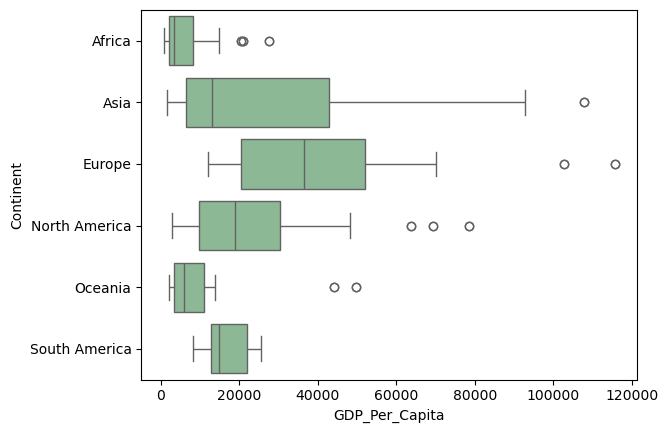

In [171]:
sns.boxplot(
        data = gdp_2021_melted
        .sort_values('Continent'), x = 'GDP_Per_Capita', y = 'Continent', color='#86bf91'
);

In [44]:
life_expectancy = pd.read_csv("../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv", skiprows = 4)

Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [46]:
life_expectancy = life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68', '2023'], errors='ignore')

In [47]:
life_expectancy = life_expectancy.melt(id_vars='Country Name')

In [48]:
life_expectancy = life_expectancy.rename(columns={"Country Name" : "Country", "variable" : "Year", "value" : "Life_Expectancy"})

What was the first country with a life expectancy to exceed 80?

Japan, in the year 1996 was the first Country to achieve this.

In [50]:
life_over_80 = life_expectancy.loc[life_expectancy['Life_Expectancy'] > 80]

In [51]:
life_over_80.sort_values('Year')

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16576,Gibraltar,2022,82.830000
16581,Greece,2022,80.636585
16588,"Hong Kong SAR, China",2022,83.660976
16550,Denmark,2022,81.304878


In [207]:
life_expectancy['Year'] = pd.to_datetime(
    life_expectancy['Year'], 
    format = '%Y', 
    errors='coerce').dt.to_period('Y')

Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [54]:
gdp_le = pd.merge(gdp_df, life_expectancy, on=['Country', 'Year'])

In [55]:
gdp_le['Year'] = gdp_le['Year'].astype(str)

Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

At least 31 Countries have a life expectancy 80 or higher in 2021.

In [57]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == '2021'].reset_index()

In [209]:
gdp_le_2021.loc[gdp_le_2021['Life_Expectancy'] >= 80].sort_values('Country').shape

(31, 7)

Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [60]:
display(gdp_le_2021.nlargest(3, 'GDP_Per_Capita'))

,index,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
91,2871,Luxembourg,2021,115683.493708,Europe,82.597561
140,4423,Singapore,2021,107741.118436,Asia,83.092683
72,2299,Ireland,2021,102785.490239,Europe,82.353659


In [61]:
gdp_le_top3 = gdp_le[gdp_le['Country'].isin(['Luxembourg', 'Singapore', 'Ireland'])].sort_values('Year')

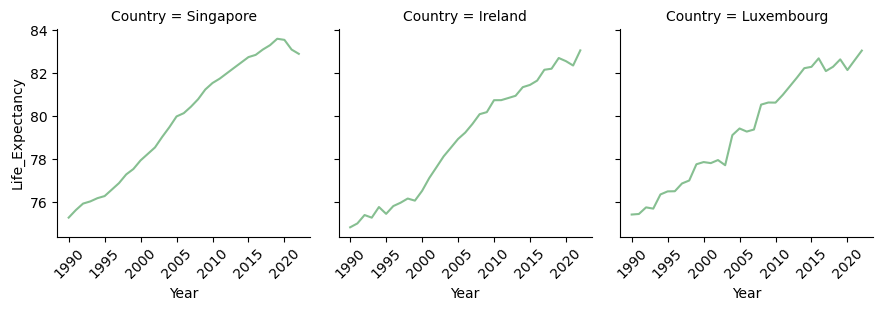

In [203]:
grid = sns.FacetGrid(gdp_le_top3, col='Country')
grid.map_dataframe(
    sns
    .lineplot, 
    x = 'Year', 
    y = 'Life_Expectancy', 
    color='#86bf91').tick_params(
    axis='x', 
    rotation=45)
plt.xticks(np.arange(0, 34, step=5));

Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

There is a smooth climb in gdp per capita as life expectancy goes up. It seems to me, the older people get, the more the country is able to have more money per person in the country.

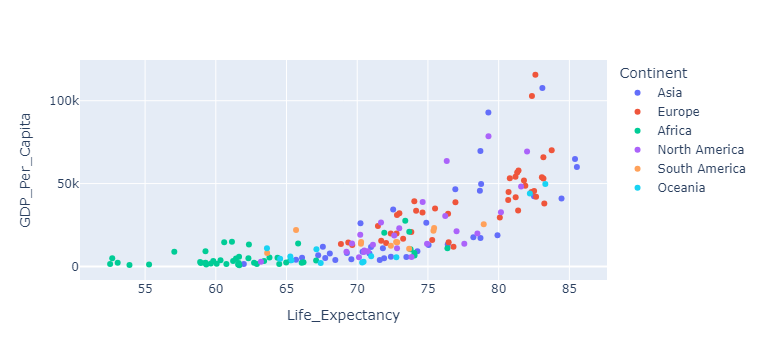

In [225]:
px.scatter(gdp_le_2021, 
           x='Life_Expectancy', 
           y='GDP_Per_Capita', 
           color='Continent'
          )

Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

The number .74 is the correlation coefficient and that says how likely it is that these events are related to each other in some way. This is a decent correlation. 

In [66]:
gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita']].corr()

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.745081
GDP_Per_Capita,0.745081,1.000000


In [119]:
gdp_le_2021['log_gdp'] = np.log(gdp_le_2021['GDP_Per_Capita'])

In [68]:
gdp_le_2021[['Life_Expectancy', 'log_gdp']].corr()

,Life_Expectancy,log_gdp
Life_Expectancy,1.000000,0.846575
log_gdp,0.846575,1.000000


Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

The log correlation is 10 points higher than the raw gdp. This is a good sign of correlation. The resulting scatter plot shows a good regression line that agrees with the correlation.

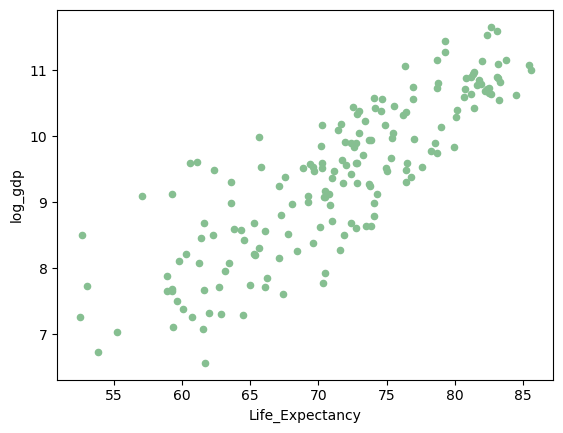

In [179]:
gdp_le_2021.plot(kind='scatter',
    x="Life_Expectancy",
    y="log_gdp",
    color='#86bf91',
);